## De-tabooing loneliness

In [1]:
import json
from datetime import datetime
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize

In [2]:
file_name = 'articles_loneliness.json'

In [3]:
json_file = open(file_name)
json_data = json.load(json_file)

print(f'The file contains metadata about {len(json_data)} publications.')

The file contains metadata about 9091 publications.


## Number of publications per year

In [4]:
dates = []

for record in json_data:

    if re.search(r'\d{4}-\d{1,2}-\d{1,2}',record['date']):
        year = datetime.strptime(record['date'], '%Y-%m-%d').year
    elif re.search(r'\d{4}-\d{1,2}',record['date']):
        year = datetime.strptime(record['date'], '%Y-%m').year
    elif re.search(r'\d{4}',record['date']):
        year = datetime.strptime(record['date'], '%Y').year
          
    if year>2000 and year<2024:
        dates.append(year)

    

In [5]:
dates_counter = Counter(dates)
x_axis = []
y_axis = []

for year in sorted(dates_counter.keys()):
    x_axis.append(str(year))
    y_axis.append(dates_counter.get(year))
    

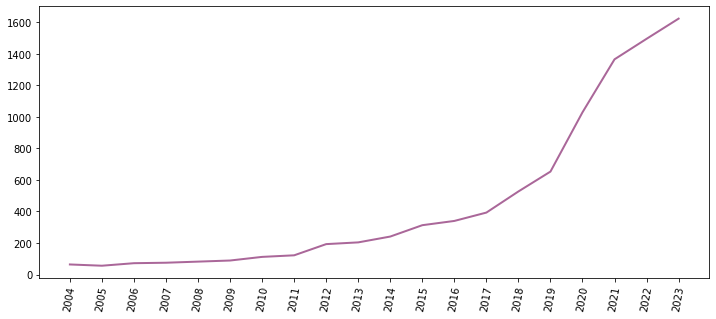

In [6]:
fig = plt.figure( figsize = ( 12, 5))
ax = sns.lineplot( x= x_axis, y=y_axis, 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

# Analysis of differences per discipline

In [7]:
subjects = []
journals = []

for record in json_data:

    if 'subject' in record:
        print('yes')
        subjects.extend(record['subject'])
        
    if 'journal' in record:
        journals.extend(record['journal'])
        
subjects_counter = Counter(subjects)
journals_counter = Counter(journals)

In [8]:
words_freq = Counter()
for journal_title in journals_counter:
    words = word_tokenize(journal_title.lower())
    words_freq.update(words)